# 1950 ~ 2021년 목포 벚꽃 개화시기 분석


**1. 현황**
*   지구 온난화로 전국 봄꽃 개화시기가 앞당겨지고 있음

*   중알일보에 따르면 서울의 공식 벚꽃 개화시기는 저년대비 4일이 빨랐다고 한다. 전문가들은 최근 평균 기온이 상승했기 때문에 벚꽃 개화일이 빨라지고 있다고 한다. 
*   전북일보에 따르면 전주 개나리에 개화 예상 시기가 평년보다 10일 빨라졌다고 한다. 전문가들은 개화시기가 빨라지고 있는 상황을 지구가 인간에게 보내는 경고라며 온실가스 배출량을 줄여야 한다고 한다. 



**2.   목적** 
*   봄꽃 개화시기가 얼마나 앞당겨지고 있는 지를 파악하고 봄꽃 개화시기가 앞당겨 지는 요인은 무엇이 있고 그 요인들로 인해 얼마나 앞당겨지고 있는 지를 파악

**3.   과제 범위** 
*   시간적 범위 : 1950 ~ 2021 (데이터에 따라 변경)  
*  공간적 범위 : 전라남도 목포시 

**4.   데이터**

* 목포 벚꽃 개화시기 데이터 - 기상자료개방포털
* 목포 평균기온 데이터 - 기상자료개방포털
* 전라남도 온실가스 배출량 데이터 - 한국환경공단(통합기후변화홍보포털)

## **목포 벚꽃 개화시기**
---



*   벚꽃 개화시기 그래프를 보면 한 눈에 보이는 것이 1990년 이전 3월달에 개화를 한 연도는 몇년 안되는 것을 확인할 수 있다. 즉, 점점 개화시기가 빨라지고 있고 1900년대와 2000년대의 차이가 많이 나는 것을 확인할 수 있다.

*   5년 평균 개화시기를 보면 1900년대 전까지는 개화가 대부분 4월에 진행됬고 1990년대 후반 부터는 점점 앞당겨지면서 2010년대에는 대부분 3월달에 개화 한 것을 볼 수 있다. 가장 늦게 개화를 한 1965 ~ 1970년도와 가장 빨리 개화를 한 2020 ~ 2022년도를 비교하면 15일 정도 차이가 난다. 2020년대가 3년 밖에 지나지 않을 것을 감안해도 많이 차이가 나는 것을 확인할 수 있다.





In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

fc-cache: succeeded


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


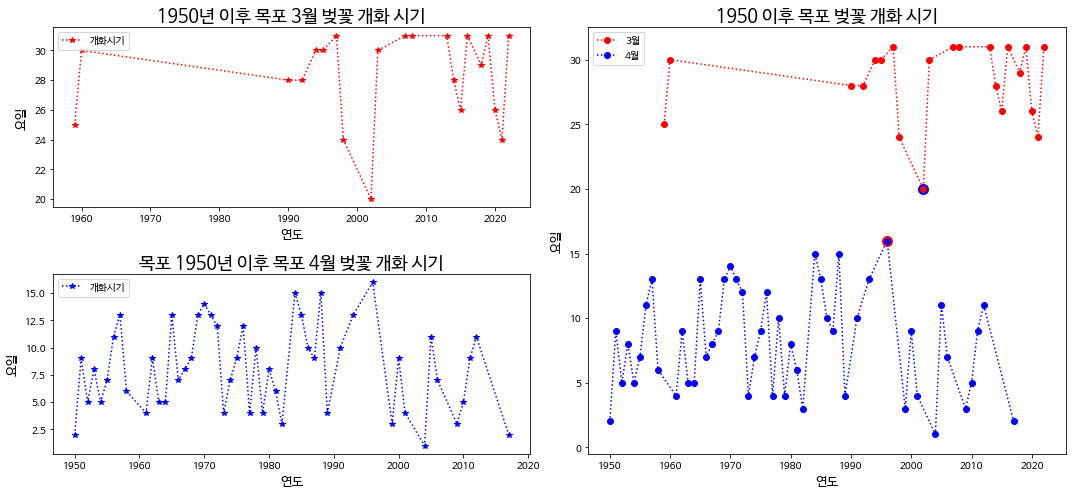

In [ ]:
# csv 파일을 읽기 위한 csv모듈 import 
import csv
# 데이터를 차트나 플롯(Plot)으로 그려주는 라이브러리 import
import matplotlib.pyplot as plt
# 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 지원하는 파이썬 패키지 numpy import
import numpy as np

# 벚나무 데이터 불러오는 코드 
f = open('CherryBlossoms.csv', 'r', encoding='cp949') 
CherryBlossoms_data = csv.reader(f)
header=next(CherryBlossoms_data)

# 차트나 그래프를 그릴 위치(공간)을 만드는 코드 
fig, ax = plt.subplots(2,2,figsize=(15,7))  #여러개의 그래프를 하나의 그림에 나타내기 위해 subplot 사용 코드 
grid = plt.GridSpec(2,2) # 그래프 공간을 2,2로 나눌 수 있도록 GridSpec 사용 코드

three_month = [] # 3월달에 개화를 한 연도 리스트
three_low = [] # 3월달 개화시기 리스트 

four_month = [] # 4월달에 개화를 한 연도 리스트 
four_low = [] # 4월달 개화시기  리스트 

# 벚나무 데이터 추출을 위한 코드
for row in CherryBlossoms_data :
    # 연도-월-요일이 비어 있지 않으면 if 문 실행 코드 
    if row[0] != "":
        # 3월달에 해당하는 데이터 추출 
        if row[0].split("-")[1] == "03":  # 연도 데이터(row[0])를 split를 사용해 "-" 기준으로 나눈 후 첫번째 인덱스 값이 "03"과 동일한지 구하는 코드
            three_month.append(int(row[0].split('-')[0]))  # 3월달에 개화를 한 해당 연도를 three_month 리스트에 추가 
            three_low.append(int(row[0].split('-')[2]))  # 3월달에 개화를 한 연도에 해당하는 요일을 three_low 리스트에 추가 

        else :
            four_month.append(int(row[0].split('-')[0])) # 4월달에 개화를 한 해당 연도를 four_month 리스트에 추가 
            four_low.append(int(row[0].split('-')[2])) # 4월달에 개화를 한 연도에 해당하는 요일을 four_low 리스트에 추가 


plt.rc('font', family = 'NanumBarunGothic') # 나눔바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 범위 0,0에 3월달 개화시기를 선 그래프로 표현
plt.subplot(grid[0,0]).plot(three_month, three_low ,'r:*', label = '개화시기') # 그래프 선 색깔 red, 선 종류 :, 마커는 *로 표시, 라벨은 개화시기 
plt.title("1950년 이후 목포 3월 벚꽃 개화 시기",fontsize=18) # 그래프 제목, 제목 크기는 18size
plt.xlabel("연도",fontsize=13)# x축 label, 라벨 크기는 18size
plt.ylabel("요일",fontsize=13)# y축 label, 라벨 크기는 18size
plt.legend() # 범례 표시

# 범위 1,0에 4월달 개화시기를 선 그래프로 출력하는 표현 
plt.subplot(grid[1,0]).plot(four_month, four_low, 'b:*', label = '개화시기')# 그래프 선 색깔 blue, 선 종류 :, 마커는 *로 표시, 라벨은 개화시기 
plt.title("목포 1950년 이후 목포 4월 벚꽃 개화 시기",fontsize=18) # 그래프 제목
plt.xlabel("연도",fontsize=13)# x축 label
plt.ylabel("요일",fontsize=13)# y축 label
plt.legend(loc="upper left") # 범례 표시

# 범위 (0,1), (1,1) 공간을 하나로 묶어 해당 위치에 개화시기를 선 그래프로 표현
plt.subplot(grid[1:]).plot(three_month, three_low, 'r:o', label = '3월')
plt.subplot(grid[1:]).plot(four_month, four_low, 'b:o', label = '4월')
plt.scatter(three_month[three_low.index(min(three_low))], three_low[three_low.index(min(three_low))], color="b",linewidth=5) # 3월달 개화시기 중 가장 빨리 개화한 요일 정점 표시 코드 
plt.scatter(four_month[four_low.index(max(four_low))], four_low[four_low.index(max(four_low))], color="r",linewidth=5) # 4월달 개화시기 중 가장 늦게 개화한 요일 정점 표시 코드
plt.title("1950 이후 목포 벚꽃 개화 시기",fontsize=18)# 그래프 제목
plt.xlabel("연도",fontsize=13)# x축 label
plt.ylabel("요일",fontsize=13)# y축 label
plt.legend() # 범례 표시

fig.tight_layout() #여백 조정
plt.show() # 그래프 나타내기

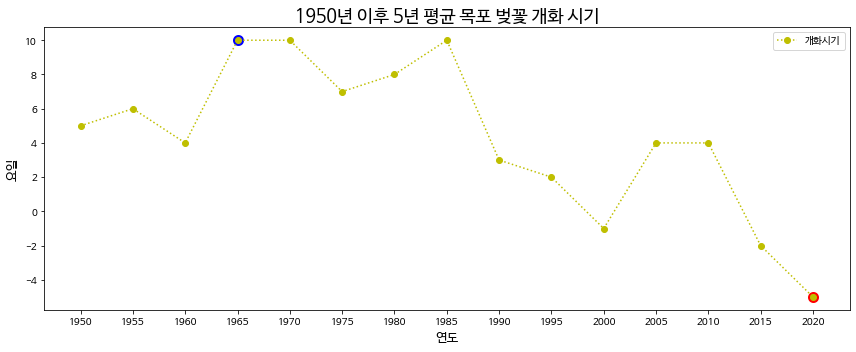

In [ ]:
# 날짜 평균을 구하기 위해 날짜를 조작하는 클래스를 제공하는 datetime 모듈 import
import datetime
# 시간 데이터를 처리하기 위해서 내장 모듈 time import
import time

# 벚나무 데이터 불러오는 코드 
f = open('CherryBlossoms.csv', 'r', encoding='cp949') 
CherryBlossoms_data = csv.reader(f)
header=next(CherryBlossoms_data)

# 차트나 그래프를 그릴 위치(공간)을 만드는 코드 
fig, ax = plt.subplots(1,2,figsize=(12, 5)) #여러개의 그래프를 하나의 그림에 나타내기 위해 subplot 사용 코드 
grid = plt.GridSpec(1,2) # 그래프 공간을 2,2로 나눌 수 있도록 GridSpec 사용 코드

year = [] # 모든 년도 담을 리스트 
low = [] # 모든 날짜를 담을 리스트
 
flower_year_5 = [] # 5년 주기 연도를 담을 리스트
avg_year_5 = [] # 5년 평균 날짜를 담을 리스트

avg_year_1990_5 = [] # 1990년 이후 5년 평균 날짜를 담을 리스트



# 5년 10년 단위로 날짜를 나누는 함수
def year_split(start_year,end_year, year,low):
    result = []
    for i in range(len(year)):
        if start_year <= int(year[i]) <= end_year :
            result.append(low[i])
    return result

# 개화시기 평균을 구하는 함수
def avg_year(avg_year):
    data_avg = []
    sec = []
    for i in avg_year :
        for j in i :
            sec.append(time.mktime(datetime.datetime.strptime(j, "%m-%d").timetuple())) # avg_year에 날짜 데이터를 각각 시간 데이터로 변환 후 추가하는 코드  
        mean = str(datetime.datetime.fromtimestamp(np.mean(sec))) # sec에 들어있는 시간 데이터에 평균을 구해서 다시 날짜 데이터로 바꾼는 함수 
        data_avg.append(mean[5:10]) # 변환된 날짜 데이터를 추가하는 함수 
        sec.clear() # sec에 들어있는 원소를 모두 제거 
    return data_avg

# 3월 4월을 구분하기 위한 함수 
def split_year(avg_year):
    result_data = []
    for i in avg_year:
        # avg_year를 "-" 기준으로 나눈 후 0번째 인덱스가 4이면 if문 실행
        if int(i.split("-")[0]) == 4:
            result_data.append(int(i.split("-")[1])) # 요일을  추가하는 코드
        # 4가 아닐 경우 실행
        else :
            result_data.append(int(i.split("-")[1]) - 32) # 요일 - 32를 한 후 추가하는 코드 
    return result_data

# 평균 개화시기를 구하는 코드 
for row in CherryBlossoms_data :
    # 연도-월-요일이 비어 있지 않으면 if 문 실행 코드 
    if row[0] != "":
        year.append(row[0].split("-")[0]) # 연도를 추가하는 코드
        low.append(row[0][5:]) #날짜를 추가하는 코드 

        # 5년 단위 연도를 구하는 코드 
        if int(row[0].split('-')[0]) % 5 == 0 : 
            flower_year_5.append(row[0].split("-")[0]) # 5년 단위 연도를 추가하는 코드
        


# year_split 함수를 실행해 5년 주기 날짜를 추가하는 코드 
avg_year_5.extend([year_split(1950,1954,year,low),year_split(1955,1959,year,low),year_split(1960,1964,year,low),year_split(1965,1969,year,low),year_split(1970,1974,year,low),
          year_split(1975,1979,year,low),year_split(1980,1984,year,low),year_split(1985,1989,year,low),year_split(1990,1994,year,low),year_split(1995,1999,year,low),
           year_split(2000,2004,year,low),year_split(2005,2009,year,low),year_split(2010,2014,year,low),year_split(2015,2019,year,low),year_split(2020,2022,year,low)])



# year_split 함수를 실행해 1990년 이후 5년 주기 날짜를 추가하는 코드 
avg_year_1990_5.extend([year_split(1990,1994,year,low),year_split(1995,1999,year,low), year_split(2000,2004,year,low),
                   year_split(2005,2009,year,low),year_split(2010,2014,year,low),year_split(2015,2019,year,low)])


avg_year_5 = avg_year(avg_year_5) # avg_year 함수를 실행해 5년 주기 평균을 변수에 할당하는 코드 
avg_year_1990 = avg_year(avg_year_1990_5) # avg_year 함수를 실행해 1990년 이후 5년 주기 평균을 변수에 할당하는 코드 

result_data_5 = split_year(avg_year_5) # split_year 함수를 실행하여 3월, 4월을 구분하여 5년 평균 요일을 해당 변수에 추가하는 코드
result_data_1990_5 = split_year(avg_year_1990) # split_year 함수를 실행하여 3월, 4월을 구분하여 1990년 이후 5년 주기 평균 요일을 해당 변수에 추가하는 코드

plt.rc('font', family = 'NanumBarunGothic') # 나눔바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 범위 0,0에 5년 평균 개화시기를 선 그래프로 표현
plt.subplot(grid[0,:]).plot(flower_year_5, result_data_5 ,'y:o', label = '개화시기') # 그래프 선 색깔 yellow, 선 종류 :, 마커는 o로 표시, 라벨은 개화시기 
plt.scatter(flower_year_5[result_data_5.index(max(result_data_5))], result_data_5[result_data_5.index(max(result_data_5))], color="b",linewidth=5) # 개화시기 중 가장 늦게 개화한 요일 정점 표시 코드 
plt.scatter(flower_year_5[result_data_5.index(min(result_data_5))], result_data_5[result_data_5.index(min(result_data_5))], color="r",linewidth=5) # 개화시기 중 가장 빨리 개화한 요일 정점 표시 코드 
plt.title("1950년 이후 5년 평균 목포 벚꽃 개화 시기",fontsize=18) # 그래프 제목, 제목 size는 18
plt.xlabel("연도",fontsize=13) # x축 label, 라벨 크기는 13
plt.ylabel("요일",fontsize=13) # y축 label, 라벨 크기는 13
plt.legend() # 범례 표시


fig.tight_layout() # 여백 조정
plt.show() # 그래프 나타내기

## **목포 평균기온**
---

*   목포 평균 기온을 보면 1990년대에는 그래프가 아랫쪽에 위치한 것을 볼 수있는 반면 1990년 부터 점점 그래프가 위로 솟구치는 것을 확인할 수 있다. 


*   5년 평균 그래프를 보면 더 확실히 평균온도가 올라가고 있는 것을 확인할 수 있다. 위에서 말한 1990년대 부터 점점 그래프가 가파르게 올라가고 있는 것을 확인할 수 있다. 

*   가장 낮은 평균기온을 기록한 1970 ~ 1974년도와 가장 높은 평균기온을 기록한 2020 ~ 2021년을 비교하면 약 1.25도 차이가 난다. 또한 두번째로 높은 평균 기온을 기록한 2015 ~ 2019년도와 비교하면 약1.14도 차이가 나는 것을 확인할 수 있다.








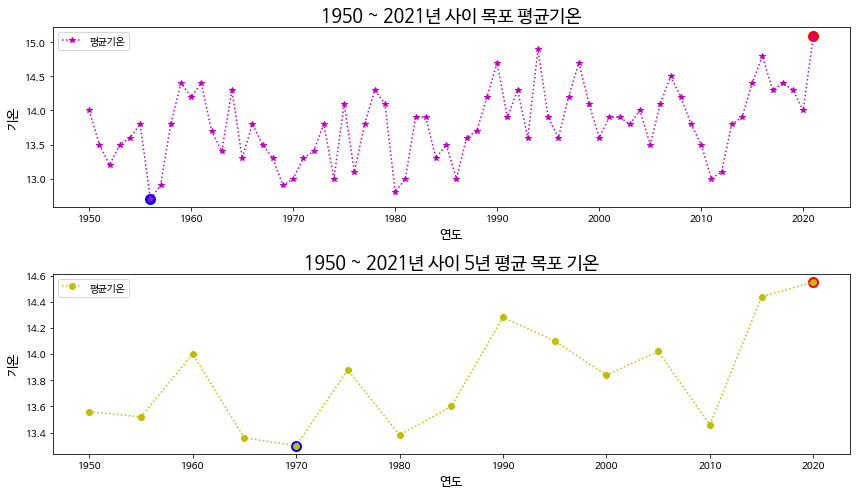

In [ ]:
# csv 파일을 읽기 위한 csv모듈 import 
import csv
# 데이터를 차트나 플롯(Plot)으로 그려주는 라이브러리 import
import matplotlib.pyplot as plt

# 평균기온 데이터 불러오는 코드 
f = open('mokpo.csv', 'r', encoding='cp949') 
data = csv.reader(f)
header = next(data)

# 차트나 그래프를 그릴 위치(공간)을 만드는 코드 
fig, ax = plt.subplots(2,2,figsize=(12, 7))
grid = plt.GridSpec(2,2)

year = [] # 년도 담을 리스트 
low = [] # 평균 기온 담을 리스트

year_5 = [] # 5년 주기 연도를 담을 리스트
low_5years = [] # 5년 평균 기온 담을 리스트

# 5년 10년 단위로 평균 기온을 구하는 함수
def avg_lows(start_year,end_year, year,low):
    result = 0
    cnt = 0
    for i in range(len(year)):
        if start_year <= year[i] <= end_year :
            result += low[i]
            cnt += 1 
    return round(result / cnt,2) # 소숫점 2번째 자리까지 반올림해서 반환

# 연도 및 기온을 구하는 코드 
for row in data: 
    years = int(row[0]) # 0번째 인덱스 변수 생성
    lows = float(row[2]) # 2번째 인덱스 변수 생성 
    # 2번째 인덱스가 비어 있지 않으면 if 문 실행 코드 
    if row[2] != '': 
        year.append(years) #연도를 추가하는 코드
        low.append(lows) # 기온 추가하는 코드 

        # 5년 단위 연도를 구하는 코드 
        if years % 5 == 0  :
            year_5.append(years) # 5년 단위 연도를 추가하는 코드 

# avg_lows 함수를 실행해 5년 주기 평균 기온을 추가하는 코드 
low_5years.append([avg_lows(1950,1954,year,low),avg_lows(1955,1959,year,low),avg_lows(1960,1964,year,low),avg_lows(1965,1969,year,low),avg_lows(1970,1974,year,low),
          avg_lows(1975,1979,year,low),avg_lows(1980,1984,year,low),avg_lows(1985,1989,year,low),avg_lows(1990,1994,year,low),avg_lows(1995,1999,year,low),
           avg_lows(2000,2004,year,low),avg_lows(2005,2009,year,low),avg_lows(2010,2014,year,low),avg_lows(2015,2019,year,low),avg_lows(2020,2021,year,low)])
low_5years = [j for i in low_5years for j in i] # 2차원 리스트를 1차원 리스트로 변환하는 코드 


plt.rc('font', family = 'NanumBarunGothic') # 나눔바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 범위 (0,0) (0,1)을 묶어 연도별 평균 기온을 선 그래프로 표현
plt.subplot(grid[0,:]).plot(year, low, 'm:*', label = '평균기온') # 그래프 선 색깔 magenta, 선 종류 :, 마커는 *로 표시, 라벨은 평균기온 
plt.title("1950 ~ 2021년 사이 목포 평균기온",fontsize=18) # 그래프 제목, 제목 size는 18
plt.xlabel("연도",fontsize=13) # x축 label, 라벨 크기는 13
plt.ylabel("기온",fontsize=13) # y축 label, 라벨 크기는 13
plt.scatter(year[low.index(max(low))], low[low.index(max(low))], color="r",linewidth=5) # 평균기온 중 가장 높은 기온 정점 표시 코드        
plt.scatter(year[low.index(min(low))], low[low.index(min(low))], color="b",linewidth=5) # 평균기온 중 가장 낮은 기온 정점 표시 코드  
plt.legend() # 범례 표시

# 범위 (1,0) (1,1)을 묶어 5년 평균 기온을 선 그래프로 표현
plt.subplot(grid[1,:]).plot(year_5, low_5years, 'y:o', label = '평균기온') # 그래프 선 색깔 yellow, 선 종류 :, 마커는 o로 표시, 라벨은 평균기온 
plt.title("1950 ~ 2021년 사이 5년 평균 목포 기온",fontsize=18) # 그래프 제목
plt.xlabel("연도",fontsize=13) # x축 label
plt.ylabel("기온",fontsize=13) # y축 label
plt.scatter(year_5[low_5years.index(max(low_5years))], low_5years[low_5years.index(max(low_5years))], color="r",linewidth=5) # 평균기온 중 가장 높은 기온 정점 표시 코드  
plt.scatter(year_5[low_5years.index(min(low_5years))], low_5years[low_5years.index(min(low_5years))], color="b",linewidth=5) # 평균기온 중 가장 높은 기온 정점 표시 코드  
plt.legend() # 범례 표시

fig.tight_layout() # 여백 조정
plt.show() # 그래프 나타내기




## **전라남도 온실가스 배출량**
---

*   온실가스 배출량은 매년 꾸준히 오르는 
것을 확인할 수 있다. 5년 평균 그래프를 확인하더라도 전년대비 꾸준히 올라가고 있는 것을 확인할 수 있다.


30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:110: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


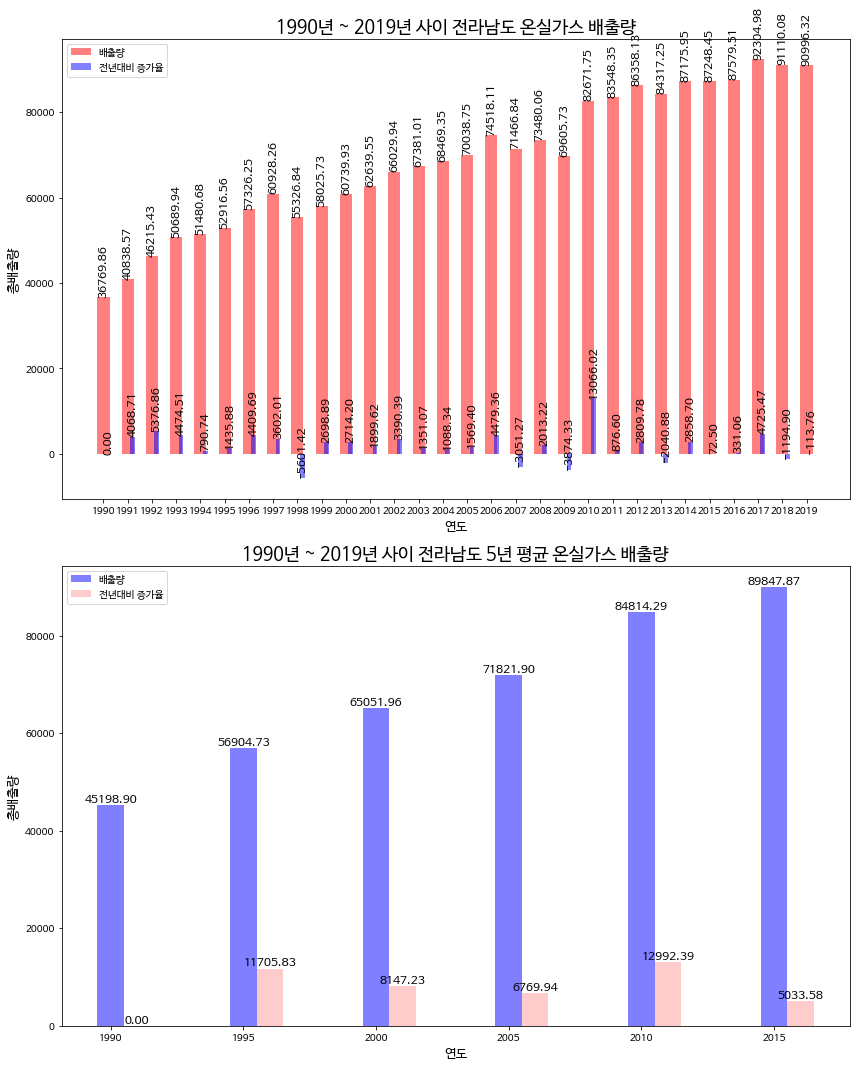

In [ ]:
# csv 파일을 읽기 위한 csv모듈 import 
import csv
# 데이터를 차트나 플롯(Plot)으로 그려주는 라이브러리 import
import matplotlib.pyplot as plt

# 온실가스 배출량 데이터 불러오는 코드 
f = open('GHG.csv', 'r', encoding='cp949') 
data = csv.reader(f)
header = next(data)

# 차트나 그래프를 그릴 위치(공간)을 만드는 코드 
fig, ax = plt.subplots(2,2,figsize=(12, 15))
grid = plt.GridSpec(2,2)

ghg_year = [] # 연도 담을 리스트 
low = [] # 배출량을 담을 리스트



ghg_year_5 = [] # 5년 주기 연도를 담을 리스트
low_5 = [] # 5년 평균 배출량을 담을 리스트

# 5년 10년 단위로 평균 배출량을 구하는 함수
def avg_ghg(start_year,end_year, ghg_year,low):
    result = 0
    cnt = 0
    for i in range(len(ghg_year)):
        if start_year <= ghg_year[i] <= end_year :
            result += low[i]
            cnt += 1
    return round(result / cnt, 2) # 소숫점 2번째 자리까지 반올림해서 반환

# 전년도 대비 증가율 구하는 함수 
def div_low(low):
    result = []
    for i in range(len(low) - 1):
        if len(result) == 0:
            result.append(0)
        result.append(round(low[i+1] - low[i], 2))
    return result

# 그래프마다 해당 값 표시하는 함수 (text 세로로 표시)
def bar_text_length(bar):
    for rect in bar:
        height = rect.get_height()
        result = plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12, rotation=90)
    return result

# 그래프마다 해당 값 표시하는 함수 
def bar_text(bar):
    for rect in bar:
        height = rect.get_height()
        result = plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)
    return result

# 연도 및 배출랴을 구하는 코드 
for row in data:
    # 0번째 인덱스가 비어 있지 않으면 if 문 실행 코드 
    if row[0] != "":
        ghg_year.append(int(row[0])) # 연도를 int형으로 변환 후 추가하는 코드 
        low.append(float(row[1])) # 배출랴을 float형으로 변환 후 추가하는 코드 
    # 5년 단위 연도를 구하는 코드 
    if int(row[0]) % 5 == 0:
        ghg_year_5.append(int(row[0]))  # 5년 단위 연도를 추가하는 코드 
    

# avg_ghg 함수를 실행해 5년 주기 평균 배출량을 추가하는 코드 
low_5.append([avg_ghg(1990,1994,ghg_year,low),avg_ghg(1995,1999,ghg_year,low),avg_ghg(2000,2004,ghg_year,low),avg_ghg(2005,2009,ghg_year,low),avg_ghg(2010,2014,ghg_year,low),avg_ghg(2015,2019,ghg_year,low)])
low_5 = [j for i in low_5 for j in i] # 2차원 리스트를 1차원 리스트로 변환하는 코드 


result_low = div_low(low)
result_low_5 = div_low(low_5) # div_low 함수를 실행해 전년도 대비 증가율을 해당 변수에 할당하는 코드 


plt.rc('font', family = 'NanumBarunGothic') # 나눔바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
print(len(ghg_year))
x = np.arange(len(ghg_year))

# 범위 (0,0), (0,1)을 묶어 연도별 온실가스 배출량을 막대 그래프로 표현 
bar = plt.subplot(grid[0,:]).bar(x, low, color="r", width=0.5, alpha=0.5, label="배출량") # 막대 그래프 색깔 red, 두께 50%, 투명도 0.5, 라벨 배출량
bar_text_length(bar) # bar_text_length 함수를 실행해서 그래프마다 해당 값 표시하는 코드
plt.title('1990년 ~ 2019년 사이 전라남도 온실가스 배출량',fontsize=18) # 그래프 제목, 라벨 크기는 18
plt.xlabel('연도',fontsize=13) # x축 label, 라벨 크기는 13
plt.ylabel('총배출량',fontsize=13) # y축 label, 라벨 크기는 13
plt.xticks(x,ghg_year) # xticks를 x 개수만큼 ghg_year_5을 label로 표현

plt.legend() # 범례 표시

#  5년 평균 전년대비 증가율을 막대 그래프로 표현 
bar = plt.subplot(grid[0,:]).bar(x+0.2, result_low, color="b", width=0.2, alpha=0.5,label="전년대비 증가율")  # x축 간격을 0.2를 더하여 표현, 그래프 색 red, 넓이 두께 20%, 투명도 0.2, 라벨 전년대비 증가율
bar_text_length(bar) # bar_text_length 함수를 실행해서 그래프마다 해당 값 표시하는 코드
plt.legend() # 범례 표시


# 1990 ~ 2019년 전라남도 탄소배출량 5년 평균 
x = np.arange(len(ghg_year_5)) # x축 데이터 개수

# 범위 (1,0), (1,1)을 묶어 5년 평균 온실가스 배출량을 막대 그래프로 표현 
bar = plt.subplot(grid[1,:]).bar(x, low_5, color="b", width=0.2, alpha=0.5, label="배출량")  # 막대 그래프 색 blue, 두께 20%, 투명도 0.5, 라벨 배출량
bar_text(bar) # bar_text 함수를 실행해서 그래프마다 해당 값 표시하는 코드
plt.title('1990년 ~ 2019년 사이 전라남도 5년 평균 온실가스 배출량',fontsize=18) # 그래프 제목, 라벨 크기는 18
plt.xlabel('연도',fontsize=13) # x축 label, 라벨 크기는 13
plt.ylabel('총배출량',fontsize=13) # y축 label, 라벨 크기는 13
plt.xticks(x,ghg_year_5) # xticks를 x 개수만큼 ghg_year_5을 label로 표현
plt.legend() # 범례 표시

#  5년 평균 전년대비 증가율을 막대 그래프로 표현 
bar = plt.subplot(grid[1,:]).bar(x+0.2, result_low_5, color="r", width=0.2, alpha=0.2,label="전년대비 증가율")  # x축 간격을 0.2를 더하여 표현, 그래프 색 red, 넓이 두께 20%, 투명도 0.2, 라벨 전년대비 증가율
bar_text(bar) # bar_text 함수를 실행해서 그래프마다 해당 값 표시하는 코드
plt.legend() # 범례 표시

fig.tight_layout() # 여백 조정
plt.show() # 그래프 나타내기

## **목포 벚꽃 개화시기 및 평균 기온 비교**
---

*   가장 높은 평균 기온을 기록한 2020년대와 그 다음 높은 기온을 기록한 2015 ~ 2019년도가 가장 빨리 개화한 것을 확인할 수 있다.

*   가장 낮은 평균 기온을 기록한 1970 ~ 1974년도와 그 다음 낮은 온도를 기록한 1965 ~ 1969년도가 가장 늦게 개화를 한 것을 확인할 수 있다. 

*  5년 평균 전년대비 온도가 가장 많이 올라간 년도는 2015 ~ 2019년도 이다. 2015 ~ 2019년에는 전년대비 온도가 0.98도가 올랐고 개화시기는 6일 앞당겨졌다. 두번째로 가장 많이 올라간 연도는 1990 ~ 1994년도 이다. 1990 ~ 1994년에는 온도가 0.68도 상승했고 개화시기는 7일 앞당겨졌다. 

*  전년대비 온도가 가장 많이 낮아진 연도는 1965  ~ 1969년도 이다. 1965  ~ 1969년도에는 온도가 0.64도 감소했고 또한 6일 늦게 개화한 것을 볼 수 있다. 






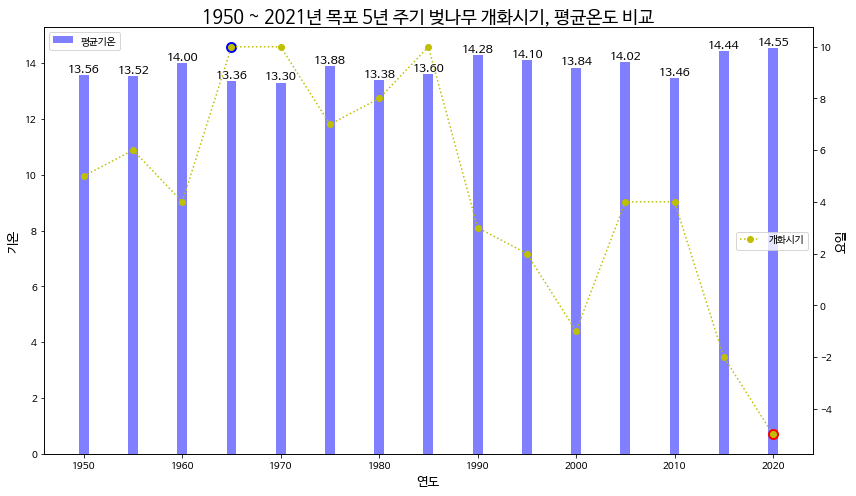

In [ ]:
# 차트나 그래프를 그릴 위치(공간)을 만드는 코드 
fig, ax = plt.subplots(1,2,figsize=(12, 7)) 
grid = plt.GridSpec(1,2)

# 그래프마다 해당 값 표시하는 함수 
def bar_text(bar):
    for rect in bar:
        height = rect.get_height()
        result = plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)
    return result

# 범위 (0,0), (0,1)을 묶어 평균 기온을 막대 그래프로 표현
bar = plt.subplot(grid[0,:]).bar(year_5, low_5years, color="b",width=1, alpha=0.5,label = '평균기온')  # 막대 그래프 색 blue, 넓이 100%, 투명도 0.5, 라벨 평균기온
bar_text(bar) # bar_text 함수를 실행해서 그래프마다 해당 값 표시하는 코드
plt.title("1950 ~ 2021년 목포 5년 주기 벚나무 개화시기, 평균온도 비교", fontsize=18)# 그래프 제목, 라벨 크기는 18
plt.xlabel("연도",fontsize=13) # x축 label, 라벨 크기는 13
plt.ylabel("기온",fontsize=13) # y축 label, 라벨 크기는 13
plt.legend() # 범례 표시

#  5년 평균 개화시기 선 그래프로 표현 
ax1 =  plt.twinx() # x축을 공유하고, y축을 오른쪽에 표시해주는 새로운 축객체 생성
ax1.plot(year_5, result_data_5,'y:o', label = '개화시기') # 그래프 선 색 yellow, 선 종류 :, 마커는 o로 표시, 라벨 개화시기 
ax1.scatter(year_5[result_data_5.index(max(result_data_5))], result_data_5[result_data_5.index(max(result_data_5))], color="b",linewidth=5) # 개화시기 중 가장 늦게 개화한 요일 정점 표시 코드 
ax1.scatter(year_5[result_data_5.index(min(result_data_5))], result_data_5[result_data_5.index(min(result_data_5))], color="r",linewidth=5) # 개화시기 중 가장 빨리 개화한 요일 정점 표시 코드 
plt.ylabel("요일",fontsize=13) # y축 label, 라벨 크기는 13
ax1.legend(loc="center right") # 범례 표시

fig.tight_layout() # 여백 조정
plt.show() # 그래프 나타내기

## **1990 ~ 2019년 사이 목포 벚꽃 개화시기 및 전라남도 온실가스 배출량 비교**
---

*   5년 평균 전년대비 배출량이 가장 많이 증가한 년도는 2010 ~ 2014년도 이다. 2010 ~ 2014년 이후 2015 ~ 2019년도 봄꽃 개화시기를 보면 약 6일 앞당겨진 것을 확인할 수 있다. 
두번째로 배출량이 가장 많이 증가한 년도는 1995 ~ 1999년도 이다. 
1995 ~ 1999년 이후 2000 ~ 2004년도 봄꽃 개화시기를 보면 약 3일 앞당겨진 것을 확인할 수 있다. 

*   전년대비 배출량이 가장 적게 증가한 년도는 2005 ~ 2009년도 이다.
2005 ~ 2009년 이후 2010 ~ 2014년도 봄꽃 개화시기를 보면 전년도 평균이랑 개화시기가 같은 것을 확인할 수 있다. 
두번째로 배출량이 가장 적게 증가한 년도는 2000 ~ 2004년도 이다. 
2000 ~ 2004년 이후 2005 ~ 2009년도 봄꽃 개화시기를 보면 약 5일 늦게 개화한 것을 확인할 수 있다.  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


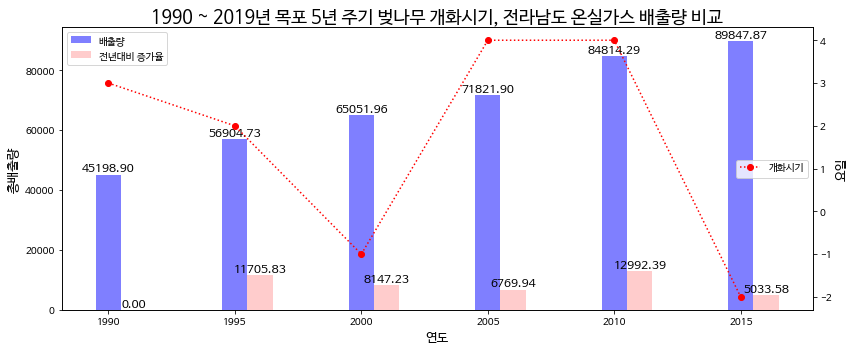

In [ ]:
# 차트나 그래프를 그릴 위치(공간)을 만드는 코드 
fig, ax = plt.subplots(1,2,figsize=(12, 5))
grid = plt.GridSpec(1,2)


# 그래프마다 해당 값 표시하는 함수 
def bar_text(bar):
    for rect in bar:
        height = rect.get_height()
        result = plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom', size = 12)
    return result

# 1990 ~ 2019년 전라남도 탄소배출량 5년 평균 

x = np.arange(len(ghg_year_5)) # x축 데이터 개수

# 범위 (0,0), (0,1)을 묶어 5년 평균 온실가스 배출량을 막대 그래프로 출력 
bar = plt.subplot(grid[0,:]).bar(x, low_5, color="b", width=0.2, alpha=0.5, label="배출량") # 그래프 색 blue, 넓이 20%, 투명도 0.5, 라벨 배출량
bar_text(bar) # bar_text 함수를 실행해서 그래프마다 해당 값 표시하는 코드
plt.title('1990 ~ 2019년 목포 5년 주기 벚나무 개화시기, 전라남도 온실가스 배출량 비교',fontsize=18) # 그래프 제목, 라벨 크기는 18
plt.xlabel('연도',fontsize=13) # x축 label, 라벨 크기는 13
plt.ylabel('총배출량',fontsize=13) # y축 label, 라벨 크기는 13
plt.xticks(x,ghg_year_5) # xticks를 x 개수만큼 ghg_year_5을 label로 표현
plt.legend() # 범례 표시

#  5년 평균 전년대비 증가율을 막대 그래프로 표현
bar = plt.subplot(grid[0,:]).bar(x+0.2, result_low_5, color="r", width=0.2, alpha=0.2,label="전년대비 증가율")  # x축 간격을 0.2를 더하여 표현, 그래프 색 red, 넓이 두께 20%, 투명도 0.2, 라벨 전년대비 증가율
bar_text(bar) # bar_text 함수를 실행해서 그래프마다 해당 값 표시하는 코드
plt.legend() # 범례 표시

#  5년 평균 개화시기 선 그래프로 표현 
ax1 =  plt.twinx() # x축을 공유하고, y축을 오른쪽에 표시해주는 새로운 축객체 생성
ax1.plot(x, result_data_1990_5 ,'r:o', label = '개화시기') # 선 색 red, 선 종류 :, 마커는 o로 표시, 라벨 개화시기 
plt.ylabel("요일", fontsize=13) # y축 label
ax1.legend(loc="center right") # 범례 표시

fig.tight_layout() # 여백 조정
plt.show() # 그래프 나타내기

# 결론 및 참고자료 

### 1. 결론 
1.   평균기온이 증가하면 봄꽃 개화시기는 빨라진다. 
2.   온실가스 배출량이 증가하면 봄꽃 개화시기가 빨라진다.
3.  온실가스 배출량이 증가하면 평균기온이 증가하고 봄꽃 개화시기 또한 앞당겨진다. 

*   온실가스 배출량이 가장 많이 증가한 2010 ~ 2014년 이후 2015 ~ 2019년를 확인하면 평균 기온은 0.98도 증가했고 봄꽃 개화시기는 6일 앞당겨졌다. 
*   반대로 온실가스 배출량이 가장 적게 증가한 2005 ~ 2009년 이후 2010 ~ 2014년를 확인하면 평균 기온은 0.56도 감소했고 봄꽃 개화시기는 전년도랑 같은 것을 확인할 수 있다. 


### 2. 참고자료 
*   https://www.jjan.kr/article/20220324580355 [출처 : 전북일보]
*   https://www.joongang.co.kr/article/25061023#home [출처: 중앙일보]
*  https://m.science.ytn.co.kr/view.php?s_mcd=0082&key=201703061058001004 [출처: YTN 사이언스]

